https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python 
## Introduction
### What is Exploratory Data Analysis ?

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

### How to perform Exploratory Data Analysis ?

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

### What data are we exploring today ?

We are using data-set of cars from Kaggle. The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.

## 1. Importing the required libraries for EDA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes=True

## 2. Loading the data into the data frame.


In [2]:
file_path = '../data/cars.csv'
df = pd.read_csv(file_path)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Checking the types of data

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Dropping irrelevant columns

In [4]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

## 5. Renaming the columns

In [5]:
df = df.rename(
    columns={
        "Engine HP": "HP", 
        "Engine Cylinders": "Cylinders", 
        "Transmission Type": "Transmission", 
        "Driven_Wheels": "Drive Mode",
        "highway MPG": "MPG-H", 
        "city mpg": "MPG-C", 
        "MSRP": "Price" 
        }
        )
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 6. Dropping the duplicate rows

In [6]:
df.shape

(11914, 10)

In [7]:
duplicated_df= df[df.duplicated()]
print(f'Duplicated rows, columns = {duplicated_df.shape}')

Duplicated rows, columns = (989, 10)


In [8]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [9]:
df=df.drop_duplicates()
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

## 7. Dropping the missing or null values.  

We can just replace the missing values with the mean or the average of that column, but in this case, we just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so we just dropped those values.

In [10]:
df.isnull().sum()
# This is the reason in the above step while counting both 
# Cylinders and Horsepower(HP) had 10856 and 10895 over 10925 rows.

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [11]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [12]:
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

## 8. Detecting Outliers    
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low.   
It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them.         
The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.       
Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

<Axes: xlabel='Price'>

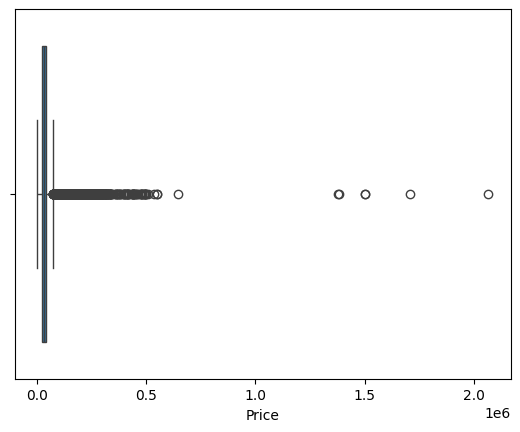

In [13]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

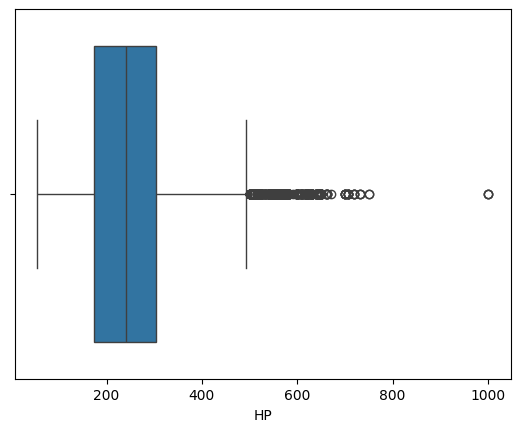

In [14]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

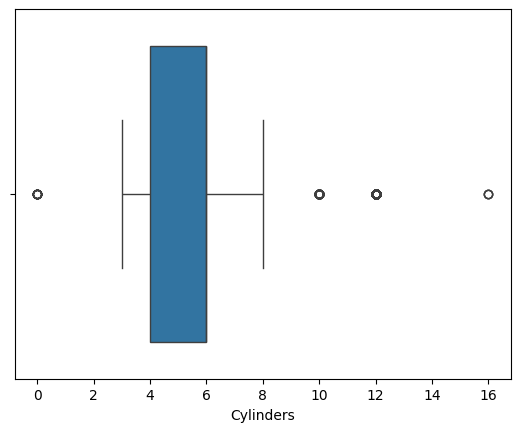

In [15]:
sns.boxplot(x=df['Cylinders'])

In [16]:
# 1. Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# 2. Calculate IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(f'IQR is: \n{IQR}')

# 3. Calculate Outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outlier_condition = (df_numeric < lower_bound) | (df_numeric > upper_bound) 

# Display outliers
df_outliers = df[outlier_condition.any(axis=1)]
print(f'\nOutliers:\n{df_outliers}\n')


IQR is: 
Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64

Outliers:
         Make     Model  Year     HP  Cylinders Transmission  \
17       Audi       100  1992  172.0        6.0       MANUAL   
19       Audi       100  1992  172.0        6.0    AUTOMATIC   
21       Audi       100  1992  172.0        6.0       MANUAL   
22       Audi       100  1993  172.0        6.0       MANUAL   
23       Audi       100  1993  172.0        6.0    AUTOMATIC   
...       ...       ...   ...    ...        ...          ...   
11794  Subaru        XT  1991  145.0        6.0       MANUAL   
11810  Toyota  Yaris iA  2017  106.0        4.0    AUTOMATIC   
11903     BMW        Z8  2001  394.0        8.0       MANUAL   
11904     BMW        Z8  2002  394.0        8.0       MANUAL   
11905     BMW        Z8  2003  394.0        8.0       MANUAL   

              Drive Mode  MPG-H  MPG-C   Price  
17     front wheel dr

In [17]:
# Filter Ouliers
df_filtered = df[~outlier_condition.any(axis=1)]
print(f'Shape of raw df: {df_numeric.shape}')
print(f'Shape of filtered DataFrame: {df_filtered.shape}\n')
print(f'Filtered DataFrame:\n{df_filtered}')

Shape of raw df: (10827, 6)
Shape of filtered DataFrame: (9191, 10)

Filtered DataFrame:
          Make       Model  Year     HP  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive Mode  MPG-H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       re

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.



## 9. Plot different features against one another (scatter), against frequency (histogram)  

### Histogram
Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

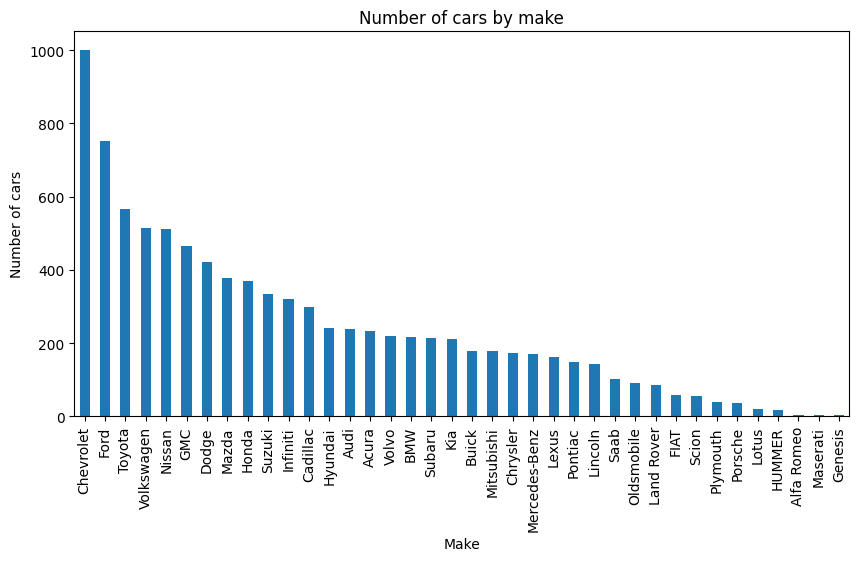

In [18]:
# Plot bar chart with the top 40 car makes on the x-axis and the number of cars on the y-axis
df_filtered['Make'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')
plt.show()

### Heat Maps   
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

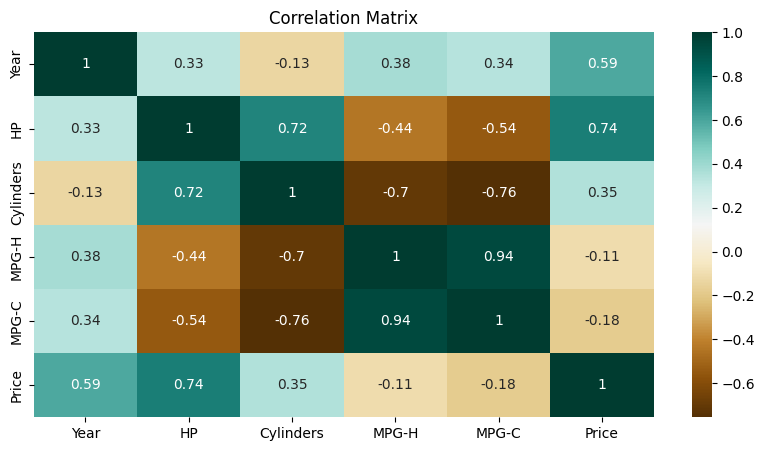

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


In [19]:
numeric_columns = df_filtered.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))
c = numeric_columns.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.title('Correlation Matrix')
plt.show()
c

### Scatterplot 
We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

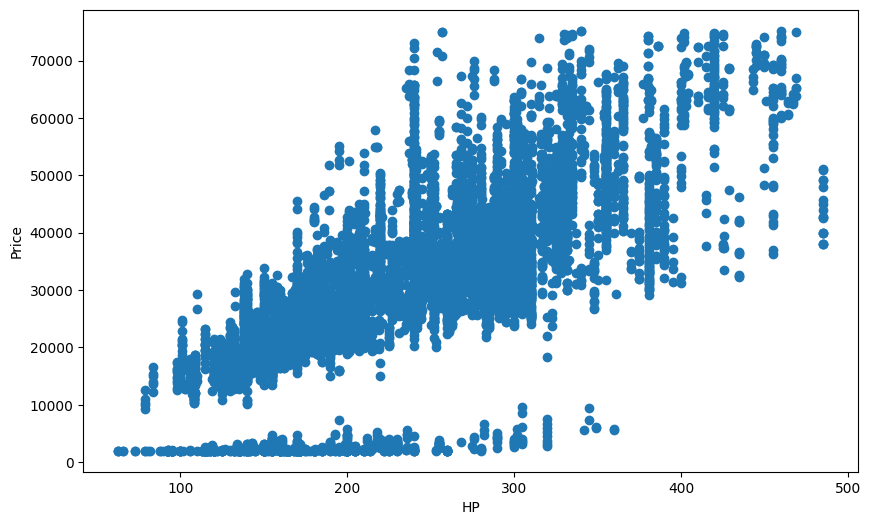

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_filtered['HP'], df_filtered['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()